In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import pylab 
import missingno as msno
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
def append_predict_class_label(file_path: str, class_labels):
    tmp_pd = pd.read_csv(file_path)
    tmp_pd.update({'class label': class_labels})
    tmp_pd.to_csv('data/data2/data2_test_result.csv', index=False)
    
def plot_data(df,feature, values):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    # copy the df
    tmp_df = df.copy()
    tmp_df[feature] = values
    # show historgram
    tmp_df[feature].hist()
    plt.subplot(1,2,2)
    # add probplot
    scipy.stats.probplot(tmp_df[feature],dist='norm',plot=pylab)
    plt.show()

# not used
def train_test_split(X, y, size=0.9):
    arr_rand = np.random.rand(X.shape[0])
    split = arr_rand < np.percentile(arr_rand, size)

    X_train = X[split]
    y_train = y[split]
    X_test =  X[~split]
    y_test = y[~split]

    return X_train, y_train, X_test, y_test

In [3]:
# Read Dataset
training_data = pd.read_csv('data/data2/training.csv')
testing_data = pd.read_csv('data/data2/validation.csv')
valid_data = pd.read_csv('data/data2/test.csv')

In [4]:
# Show first 5 row data
training_data.head()

,attribute 1,attribute 2,attribute 3,attribute 4,attribute 5,attribute 6,attribute 7,attribute 8,attribute 9,attribute 10,attribute 11,attribute 12,attribute 13,attribute 14,attribute 15,class label
0,yes,3.0000,3.0000,Sometimes,no,2.0313,no,1.6560,0.9400,Sometimes,P,21.2327,1.7199,52626.9924,yes,5
1,yes,2.3159,2.6585,Sometimes,no,1.9292,no,0.9500,0.5449,Sometimes,P,23.1543,1.7231,32935.3856,yes,1
2,yes,3.0000,2.0846,Sometimes,no,2.6292,yes,0.1962,0.0625,no,P,19.0000,1.5562,16935.9068,no,4
3,yes,3.0000,1.0000,Sometimes,no,2.4600,no,3.0000,0.0000,Sometimes,W,21.0000,1.7600,31200.0000,yes,1
4,yes,2.0000,3.0000,Sometimes,no,1.2300,no,0.0000,2.0000,no,A,36.0000,1.6500,32000.0000,yes,1


In [5]:
# Show data information
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attribute 1   1610 non-null   object 
 1   attribute 2   1610 non-null   float64
 2   attribute 3   1610 non-null   float64
 3   attribute 4   1610 non-null   object 
 4   attribute 5   1610 non-null   object 
 5   attribute 6   1610 non-null   float64
 6   attribute 7   1610 non-null   object 
 7   attribute 8   1610 non-null   float64
 8   attribute 9   1610 non-null   float64
 9   attribute 10  1610 non-null   object 
 10  attribute 11  1610 non-null   object 
 11  attribute 12  1610 non-null   float64
 12  attribute 13  1610 non-null   float64
 13  attribute 14  1610 non-null   float64
 14  attribute 15  1610 non-null   object 
 15  class label   1610 non-null   int64  
dtypes: float64(8), int64(1), object(7)
memory usage: 201.4+ KB


<AxesSubplot: >

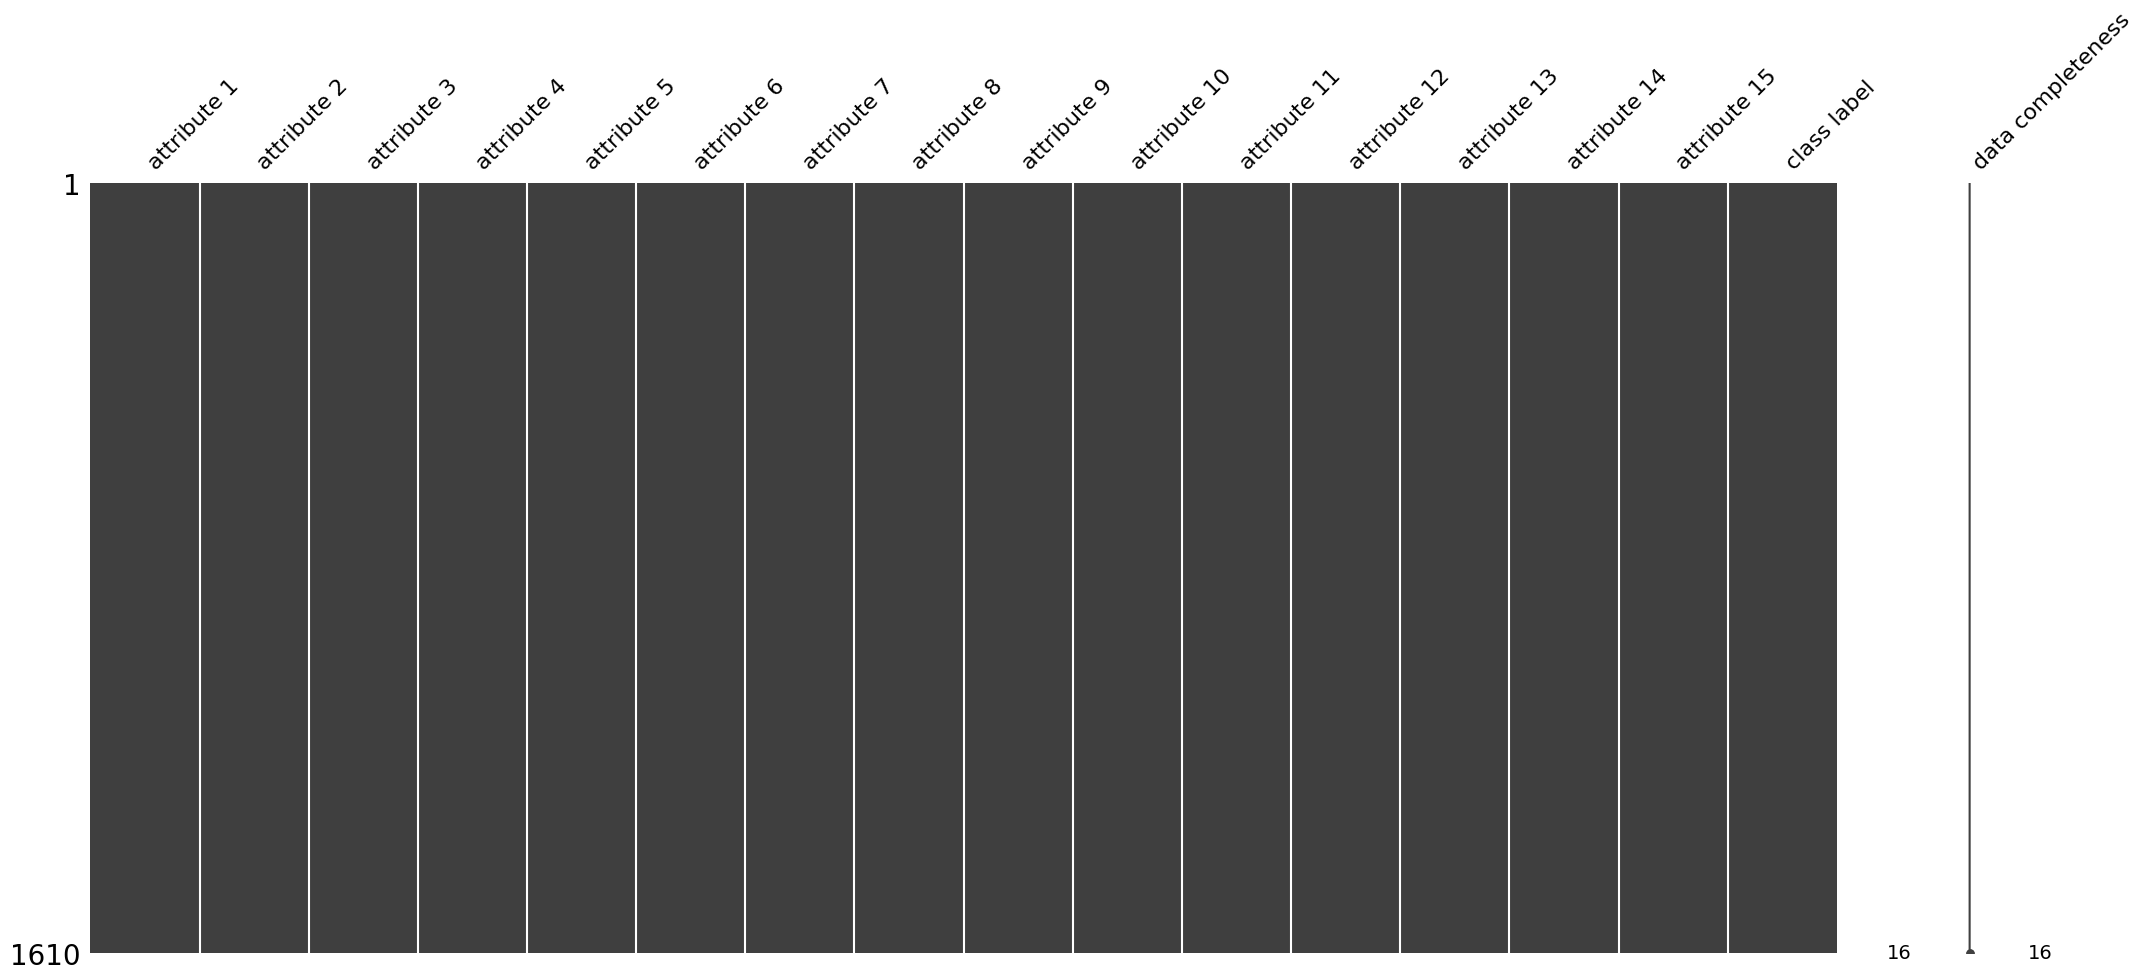

In [6]:
#show missing value
msno.matrix(training_data, labels=True)

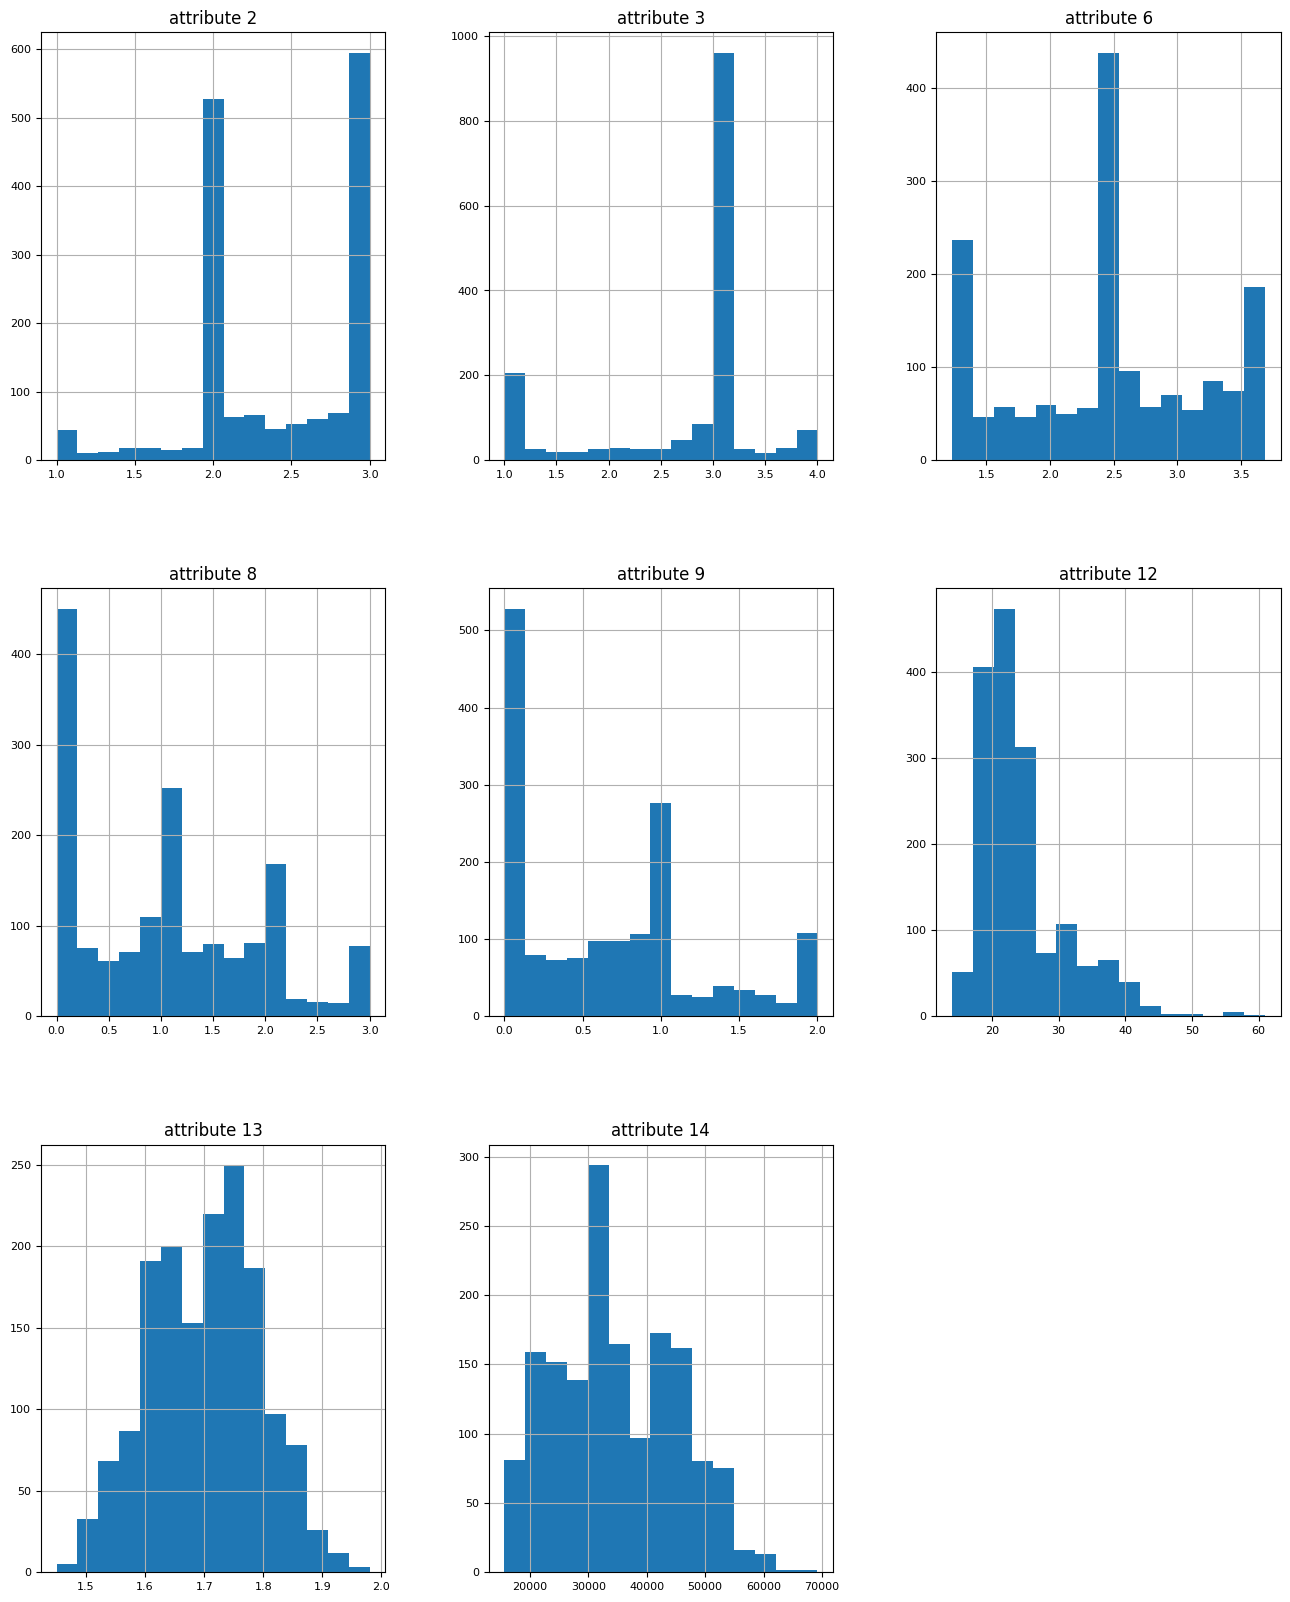

In [7]:
# show all numeria data histogram
training_data.iloc[:, :-1].hist(figsize=(16, 20), bins=15, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

<AxesSubplot: >

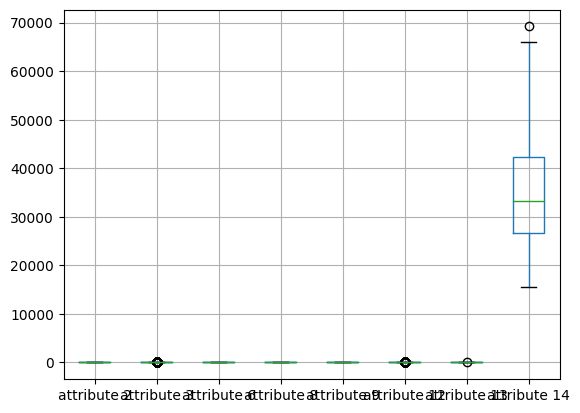

In [8]:
# Show boxplot for all numeria data
training_data.iloc[:, :-1].boxplot()

<AxesSubplot: >

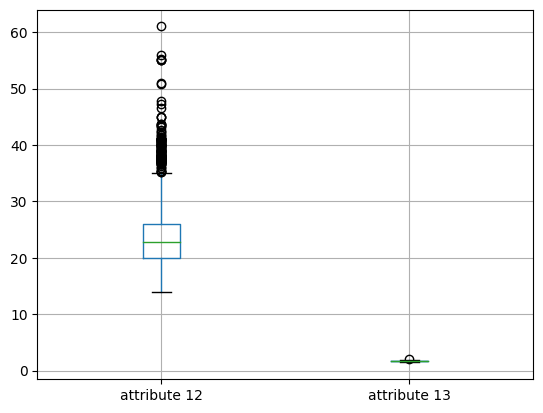

In [9]:
training_data.iloc[:,11:-3].boxplot()

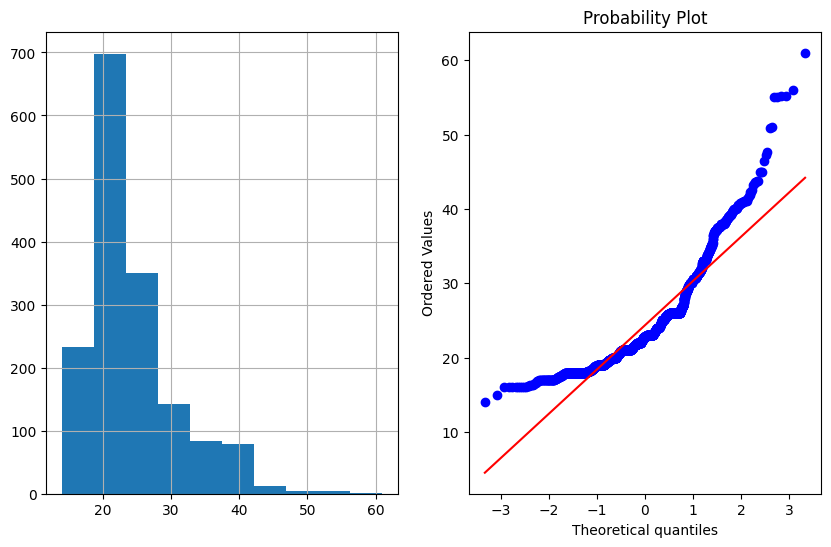

In [10]:
# call the plot_data method to show attribute 12 whether normal distribution
plot_data(training_data, 'attribute 12', training_data['attribute 12'])

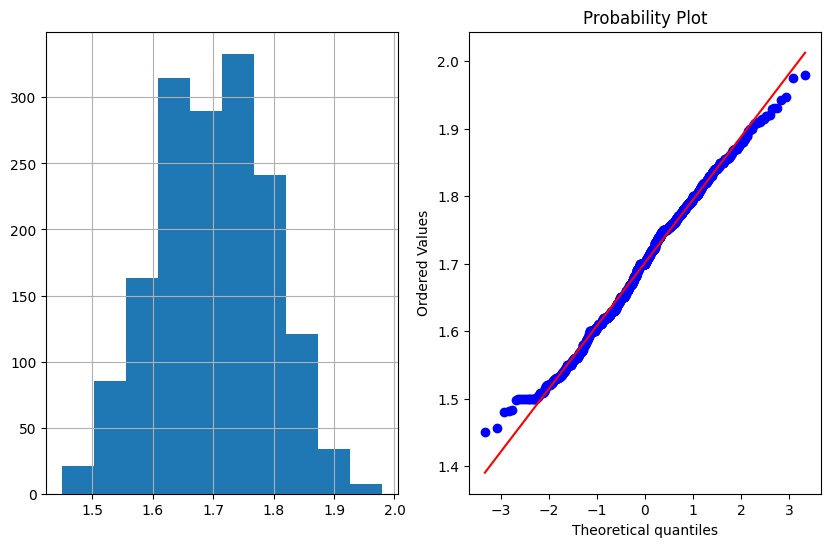

In [11]:
# call the plot_data method to show attribute 13 whether normal distribution
plot_data(training_data, 'attribute 13', training_data['attribute 13'])

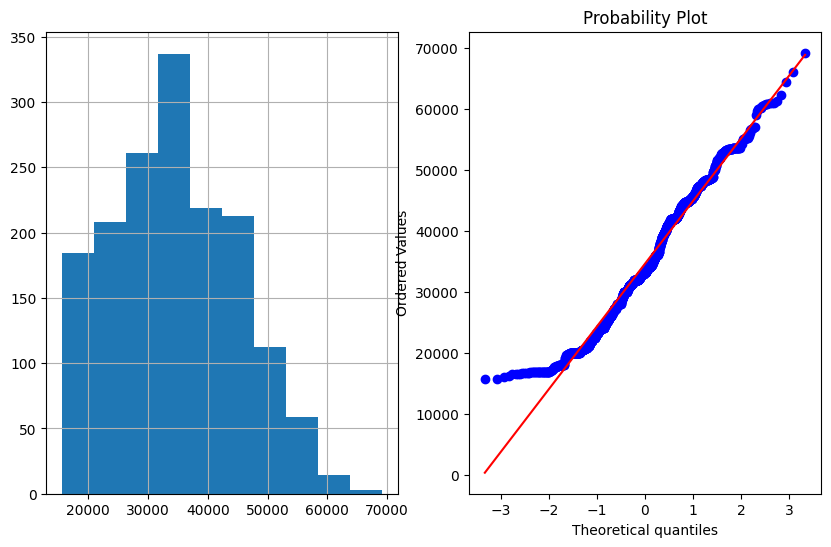

In [12]:
# call the plot_data method to show attribute 14 whether normal distribution
plot_data(training_data, 'attribute 14', training_data['attribute 14'])

## Attribute String value Encode

In [13]:
# Create the class to store the string row
class IssueFrame:
    def __init__(self, col_name: str, values: list, freq) -> None:
        self.col_name = col_name
        self.values = values
        self.freq = freq
    # print value
    def __str__(self) -> str:
        return f"Column name: {self.col_name}\nvalues: {self.values}\n{self.freq}\n{'-'*40}"

In [14]:
issue_f = {}

# Loop all row if dtype is object which mean string type
for object_col in training_data.select_dtypes(include='object').columns:
    issf = IssueFrame(object_col, np.unique(training_data[object_col]), training_data[object_col].value_counts())
    print(issf)
    issue_f[object_col] = issf


Column name: attribute 1
values: ['no' 'yes']
yes    1420
no      190
Name: attribute 1, dtype: int64
----------------------------------------
Column name: attribute 4
values: ['1' '22' '5' '8' 'Always' 'Frequently' 'Sometimes' 'no']
Sometimes     1338
Frequently     184
no              43
Always          41
22               1
8                1
1                1
5                1
Name: attribute 4, dtype: int64
----------------------------------------
Column name: attribute 5
values: ['no' 'yes']
no     1575
yes      35
Name: attribute 5, dtype: int64
----------------------------------------
Column name: attribute 7
values: ['no' 'yes']
no     1536
yes      74
Name: attribute 7, dtype: int64
----------------------------------------
Column name: attribute 10
values: ['Always' 'Frequently' 'Sometimes' 'no']
Sometimes     1076
no             479
Frequently      54
Always           1
Name: attribute 10, dtype: int64
----------------------------------------
Column name: attribute 11
valu

In [15]:
# String encode
df_str_encode = {}

def data_str_encoding(df: pd.DataFrame):
    tmp_df = df.copy()
    for key in df_str_encode.keys():
        for i, val in enumerate(df_str_encode[key]):
            tmp_df[key] =tmp_df[key].str.replace(str(val), str(i))
    return tmp_df

for key in issue_f.keys():
    print(issue_f[key])
    # For remove 'number' value 
    if key == 'attribute 4':
        training_data['attribute 4'] = training_data['attribute 4'].str.replace('\d+', '')
        training_data = training_data[training_data['attribute 4'] != '']
    # factorize will encode the string to number (0,1,2...)
    labels, levels = pd.factorize(training_data[key])
    df_str_encode[key] = levels
    training_data[key] = labels

        

Column name: attribute 1
values: ['no' 'yes']
yes    1420
no      190
Name: attribute 1, dtype: int64
----------------------------------------
Column name: attribute 4
values: ['1' '22' '5' '8' 'Always' 'Frequently' 'Sometimes' 'no']
Sometimes     1338
Frequently     184
no              43
Always          41
22               1
8                1
1                1
5                1
Name: attribute 4, dtype: int64
----------------------------------------
Column name: attribute 5
values: ['no' 'yes']
no     1575
yes      35
Name: attribute 5, dtype: int64
----------------------------------------
Column name: attribute 7
values: ['no' 'yes']
no     1536
yes      74
Name: attribute 7, dtype: int64
----------------------------------------
Column name: attribute 10
values: ['Always' 'Frequently' 'Sometimes' 'no']
Sometimes     1076
no             479
Frequently      54
Always           1
Name: attribute 10, dtype: int64
----------------------------------------
Column name: attribute 11
valu

/var/folders/7p/6n_cnlys0vsg3jk0nz9cch4w0000gn/T/ipykernel_985/1781424345.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  training_data['attribute 4'] = training_data['attribute 4'].str.replace('\d+', '')


In [16]:
# describe the data after the data clearning
training_data.iloc[:, :-1].describe()

,attribute 1,attribute 2,attribute 3,attribute 4,attribute 5,attribute 6,attribute 7,attribute 8,attribute 9,attribute 10,attribute 11,attribute 12,attribute 13,attribute 14,attribute 15
count,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000
mean,0.117684,2.420143,2.686711,0.334994,0.021793,2.464966,0.045455,1.019487,0.643548,0.367372,0.501245,24.370920,1.701564,34628.769320,0.184309
std,0.322334,0.534291,0.774689,0.782907,0.146053,0.757484,0.208364,0.862683,0.604466,0.550983,0.880915,6.399478,0.093530,10372.347947,0.387857
min,0.000000,1.000000,1.000000,0.000000,0.000000,1.230000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,1.450000,15640.722000,0.000000
25%,0.000000,2.000000,2.694050,0.000000,0.000000,1.939550,0.000000,0.114875,0.000000,0.000000,0.000000,19.948725,1.629250,26660.370700,0.000000
50%,0.000000,2.386450,3.000000,0.000000,0.000000,2.460000,0.000000,1.000000,0.598600,0.000000,0.000000,22.829750,1.700200,33200.000000,0.000000
75%,0.000000,3.000000,3.000000,0.000000,0.000000,3.017125,0.000000,1.682800,1.000000,1.000000,1.000000,26.000000,1.768200,42418.401600,0.000000
max,1.000000,3.000000,4.000000,3.000000,1.000000,3.690000,1.000000,3.000000,2.000000,3.000000,4.000000,61.000000,1.980000,69200.000000,1.000000


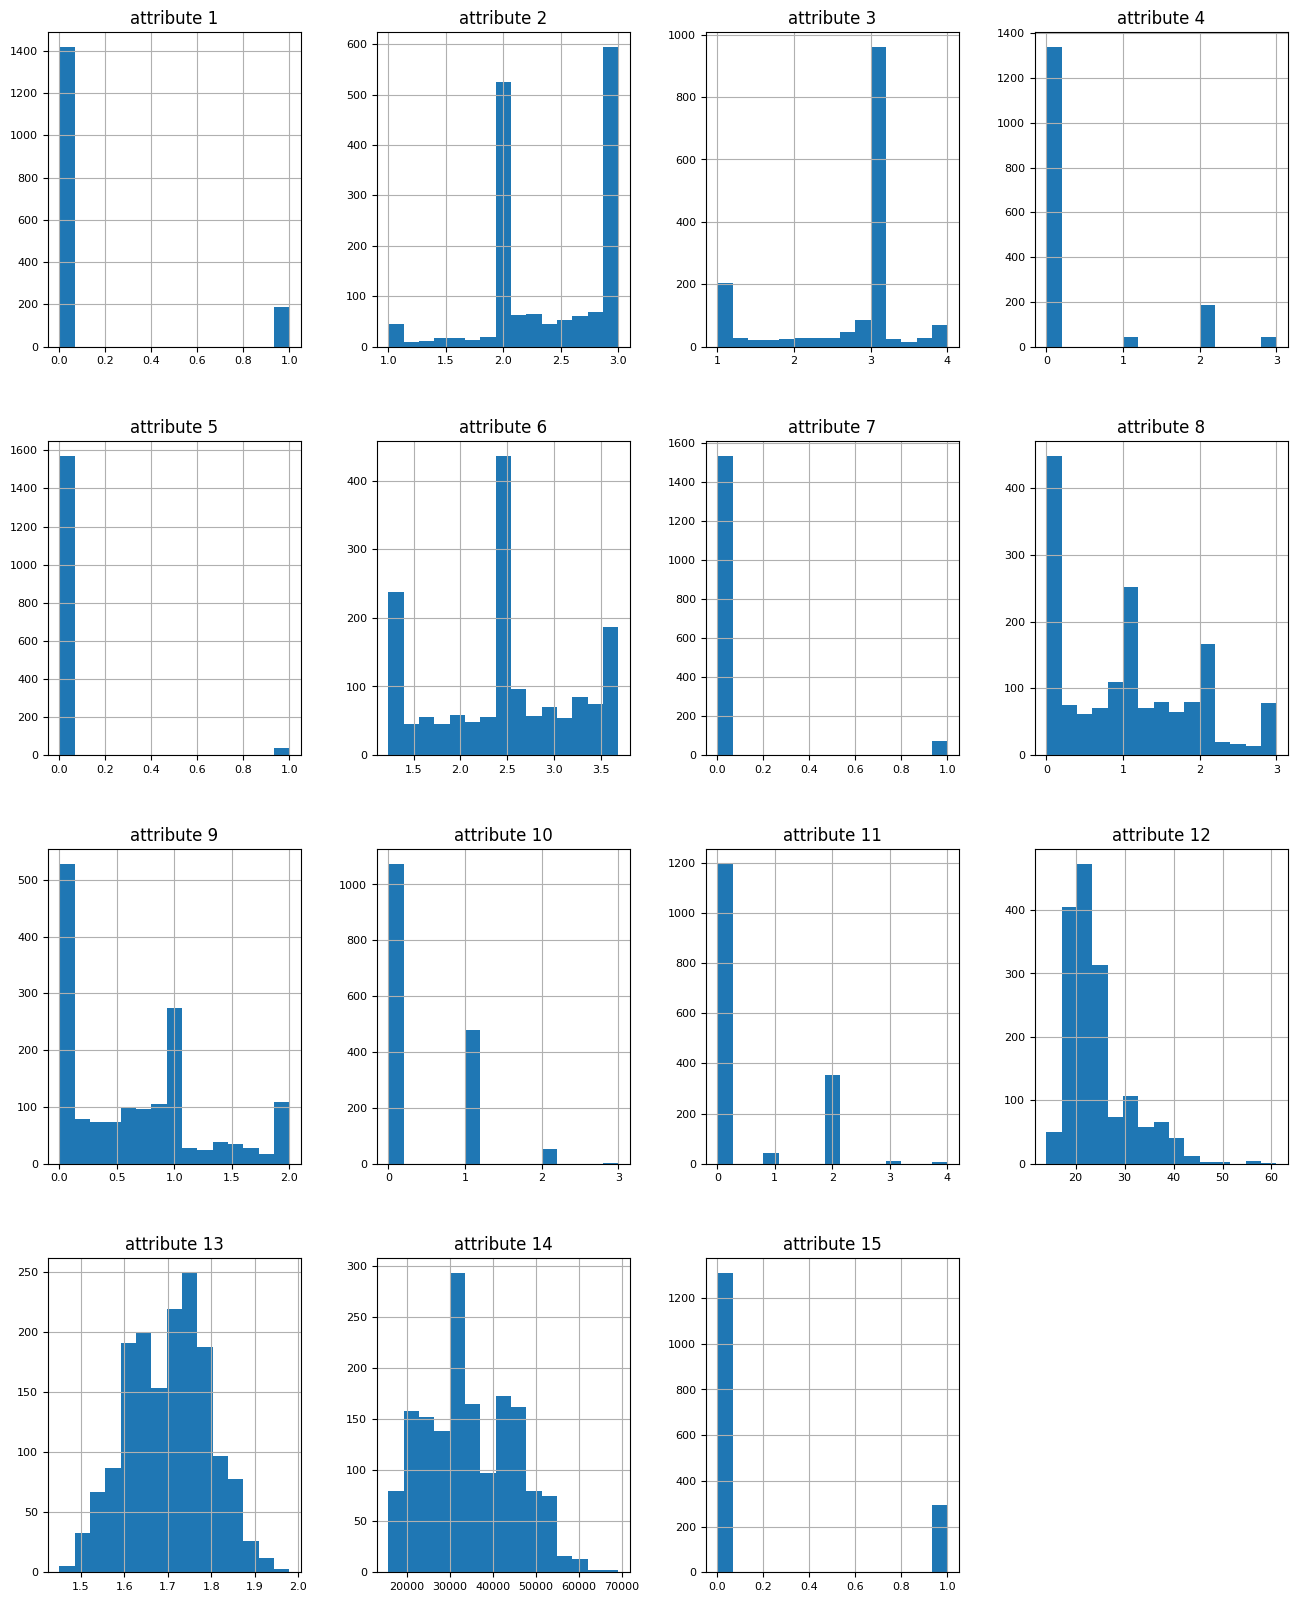

In [17]:
# show the historgram after the data clearning
training_data.iloc[:, :-1].hist(figsize=(16, 20), bins=15, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

# Feature Selection

<AxesSubplot: >

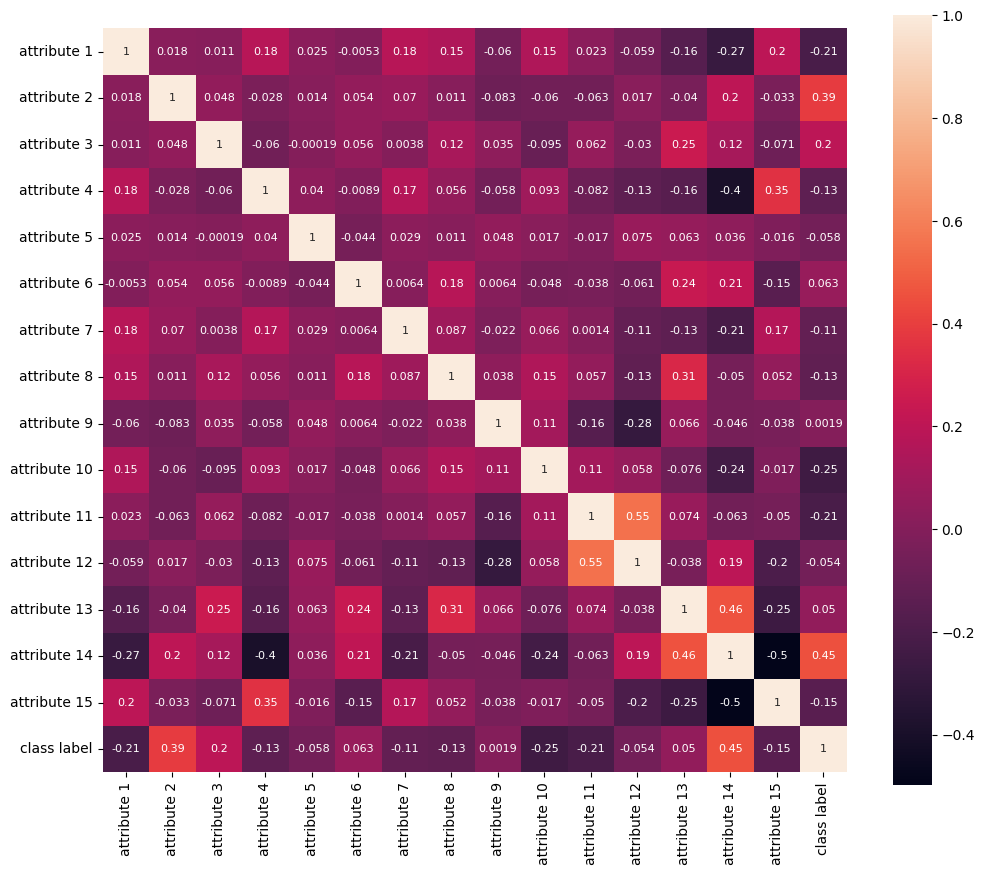

In [18]:
# correlation relationship diagram
training_data_corr = training_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(training_data_corr, 
        xticklabels=training_data_corr.columns,
        yticklabels=training_data_corr.columns,
        annot=True, annot_kws={"size": 8}, square=True)

In [19]:
# correlation relationship of class label
training_data_corr['class label']

attribute 1    -0.206919
attribute 2     0.390880
attribute 3     0.197334
attribute 4    -0.130202
attribute 5    -0.057843
attribute 6     0.063329
attribute 7    -0.113313
attribute 8    -0.128341
attribute 9     0.001850
attribute 10   -0.251466
attribute 11   -0.208653
attribute 12   -0.054177
attribute 13    0.050235
attribute 14    0.450433
attribute 15   -0.150864
class label     1.000000
Name: class label, dtype: float64

In [20]:
# also encode the testing data
testing_data = data_str_encoding(testing_data)

In [21]:
# remove not unnecessary columns
features = training_data.columns.copy()
features = features.drop('attribute 1')
features = features.drop('attribute 2')
features = features.drop('attribute 3')
features = features.drop('attribute 4')
features = features.drop('attribute 5')
features = features.drop('attribute 7')
features = features.drop('attribute 9')
features = features.drop('attribute 10')
features = features.drop('attribute 11')
features = features.drop('attribute 12')
features = features.drop('attribute 15')

train_df_feature_selected = training_data[features].copy()
test_df_feature_selected = testing_data[features].copy()
vaild_df_feature_selected = valid_data[features].copy()


In [22]:
from random_forest import RandomForest
# create the Random Forest class implement by myself
rfc = RandomForest(n_estimators=50)
rfc.fit(train_df_feature_selected.iloc[:, :-1], train_df_feature_selected.iloc[:,-1])

Tree Building: 100% [###########################################] Time: 0:10:22


In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0, n_estimators=50)
rfc.fit(train_df_feature_selected.iloc[:,:-1], train_df_feature_selected.iloc[:,-1])

RandomForestClassifier(n_estimators=50, random_state=0)

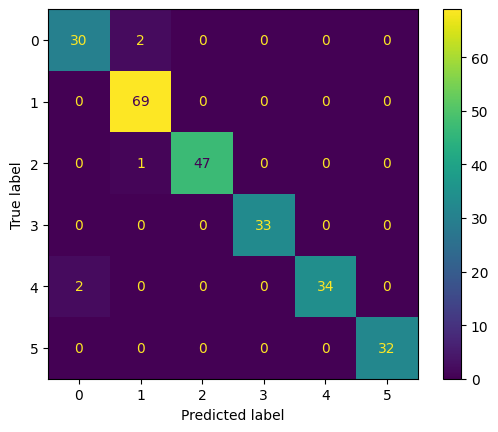

Correct Prediction are: 245
In Correct Prediction are: 5
Accuracy: 0.98
Macro: 0.9795209433157361
Micro 0.98


In [24]:
# predict the testing data
y_pred = rfc.predict(test_df_feature_selected.iloc[:, :-1])
y_test = testing_data.iloc[:,-1]

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=np.unique(training_data.iloc[:,-1]))
disp.plot()
plt.show()
print("Correct Prediction are:", sum(y_test == y_pred))
print("In Correct Prediction are:", sum(y_test != y_pred))
print("Accuracy:", sum(y_test == y_pred)/len(y_pred))
print("="*20)

print("Macro:", f1_score(y_test, y_pred, average='macro'))
print("Micro", f1_score(y_test, y_pred, average='micro'))

print("="*20)

In [26]:
# predict the test data and append to files
y_pred =rfc.predict(vaild_df_feature_selected.iloc[:,:-1])
append_predict_class_label('data/data2/test.csv', pd.Series(y_pred, dtype="Int64"))